(this notebook shows the last phase of Udemy Course exercise: https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery/learn/lecture/25054752#overview )

## Get the data

In [1]:
import os
os.getcwd()

'/content'

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2022-07-12 15:40:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   251MB/s    in 2.0s    

2022-07-12 15:40:32 (251 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
# Walk through ten classes of foof image data

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'{dirpath}, {len(dirnames)}, {len(filenames)}')

10_food_classes_all_data, 2, 0
10_food_classes_all_data/train, 10, 0
10_food_classes_all_data/train/pizza, 0, 750
10_food_classes_all_data/train/steak, 0, 750
10_food_classes_all_data/train/grilled_salmon, 0, 750
10_food_classes_all_data/train/hamburger, 0, 750
10_food_classes_all_data/train/chicken_curry, 0, 750
10_food_classes_all_data/train/chicken_wings, 0, 750
10_food_classes_all_data/train/fried_rice, 0, 750
10_food_classes_all_data/train/ice_cream, 0, 750
10_food_classes_all_data/train/ramen, 0, 750
10_food_classes_all_data/train/sushi, 0, 750
10_food_classes_all_data/test, 10, 0
10_food_classes_all_data/test/pizza, 0, 250
10_food_classes_all_data/test/steak, 0, 250
10_food_classes_all_data/test/grilled_salmon, 0, 250
10_food_classes_all_data/test/hamburger, 0, 250
10_food_classes_all_data/test/chicken_curry, 0, 250
10_food_classes_all_data/test/chicken_wings, 0, 250
10_food_classes_all_data/test/fried_rice, 0, 250
10_food_classes_all_data/test/ice_cream, 0, 250
10_food_classes_

In [4]:
# Setup train and test dorectories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [5]:
# import ImageDataGenerator class 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# Create augmented and not augmented train datasets

# Create data generators
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=.2,
                                   shear_range=.2,
                                   zoom_range=.2,
                                   height_shift_range=.3,
                                   horizontal_flip=True
                                  )

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

# Create batch flow from directories
train_data_aug = train_datagen_aug.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              batch_size=32)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode='categorical',
                                            batch_size=32)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Data analysis
I omit this step (already have been done). I go straight to experimentation and enhancing the model. I switched to Colab from my Jupyter Lab on Anaconda due to cloud computing. 

## Overview of previous experiments.

### A. Training the CNN model on not augmented data proved to quickly ooverfit the model:
```
model_6_1 = Sequential([
    Conv2D(filters=10,
          kernel_size=3,
          input_shape=(224, 224, 3)),
    Activation('relu'),
    Conv2D(10, 3),
    Activation('relu'),
    SpatialDropout2D(0.5),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation('relu'),
    Conv2D(10, 3),
    Activation('relu'),
    SpatialDropout2D(0.5),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')])
```


```
Epoch 1/10
235/235 [==============================] - 460s 2s/step - loss: 2.3031 - accuracy: 0.1160 - val_loss: 2.2721 - val_accuracy: 0.1568
Epoch 2/10
235/235 [==============================] - 447s 2s/step - loss: 2.2709 - accuracy: 0.1387 - val_loss: 2.2511 - val_accuracy: 0.1764
Epoch 3/10
235/235 [==============================] - 400s 2s/step - loss: 2.2382 - accuracy: 0.1652 - val_loss: 2.2385 - val_accuracy: 0.1760
Epoch 4/10
235/235 [==============================] - 420s 2s/step - loss: 2.2011 - accuracy: 0.1827 - val_loss: 2.1639 - val_accuracy: 0.1792
Epoch 5/10
235/235 [==============================] - 387s 2s/step - loss: 2.1717 - accuracy: 0.2032 - val_loss: 2.1378 - val_accuracy: 0.2160
Epoch 6/10
235/235 [==============================] - 407s 2s/step - loss: 2.1166 - accuracy: 0.2363 - val_loss: 2.1017 - val_accuracy: 0.2184
Epoch 7/10
235/235 [==============================] - 311s 1s/step - loss: 2.0294 - accuracy: 0.2877 - val_loss: 2.0932 - val_accuracy: 0.2296
Epoch 8/10
235/235 [==============================] - 306s 1s/step - loss: 1.9159 - accuracy: 0.3445 - val_loss: 2.1078 - val_accuracy: 0.2204
Epoch 9/10
235/235 [==============================] - 343s 1s/step - loss: 1.7448 - accuracy: 0.4137 - val_loss: 2.1579 - val_accuracy: 0.2184
Epoch 10/10
235/235 [==============================] - 346s 1s/step - loss: 1.5738 - accuracy: 0.4797 - val_loss: 2.2440 - val_accuracy: 0.2184
```

### B. Adding a SpatialDropout2D layer and reducing number of convolutional layers improved the model behaviour. Unfortunatelly training takes forever.

```
model_7_2 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    SpatialDropout2D(0.35),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation('relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])
```

```
Epoch 1/15
235/235 [==============================] - 260s 1s/step - loss: 2.3145 - accuracy: 0.1225 - val_loss: 2.2135 - val_accuracy: 0.1908
Epoch 2/15
235/235 [==============================] - 264s 1s/step - loss: 2.2191 - accuracy: 0.1739 - val_loss: 2.1123 - val_accuracy: 0.2632
Epoch 3/15
235/235 [==============================] - 260s 1s/step - loss: 2.1609 - accuracy: 0.2109 - val_loss: 2.0577 - val_accuracy: 0.2708
Epoch 4/15
235/235 [==============================] - 250s 1s/step - loss: 2.1306 - accuracy: 0.2349 - val_loss: 1.9916 - val_accuracy: 0.2768
Epoch 5/15
235/235 [==============================] - 255s 1s/step - loss: 2.0952 - accuracy: 0.2545 - val_loss: 1.9720 - val_accuracy: 0.2912
Epoch 6/15
235/235 [==============================] - 250s 1s/step - loss: 2.0619 - accuracy: 0.2707 - val_loss: 1.8972 - val_accuracy: 0.3508
Epoch 7/15
235/235 [==============================] - 264s 1s/step - loss: 2.0449 - accuracy: 0.2752 - val_loss: 1.8881 - val_accuracy: 0.3628
Epoch 8/15
235/235 [==============================] - 253s 1s/step - loss: 2.0343 - accuracy: 0.2823 - val_loss: 1.8773 - val_accuracy: 0.3572
Epoch 9/15
235/235 [==============================] - 269s 1s/step - loss: 2.0297 - accuracy: 0.2887 - val_loss: 1.8466 - val_accuracy: 0.3504
Epoch 10/15
235/235 [==============================] - 208s 885ms/step - loss: 1.9934 - accuracy: 0.2985 - val_loss: 1.8007 - val_accuracy: 0.3936
Epoch 11/15
235/235 [==============================] - 193s 820ms/step - loss: 1.9939 - accuracy: 0.3029 - val_loss: 1.8883 - val_accuracy: 0.3360
Epoch 12/15
235/235 [==============================] - 251s 1s/step - loss: 1.9697 - accuracy: 0.3181 - val_loss: 1.8281 - val_accuracy: 0.3588
Epoch 13/15
235/235 [==============================] - 312s 1s/step - loss: 1.9616 - accuracy: 0.3143 - val_loss: 1.8224 - val_accuracy: 0.3676
Epoch 14/15
235/235 [==============================] - 319s 1s/step - loss: 1.9651 - accuracy: 0.3121 - val_loss: 1.8135 - val_accuracy: 0.3764
Epoch 15/15
235/235 [==============================] - 312s 1s/step - loss: 1.9493 - accuracy: 0.3201 - val_loss: 1.8012 - val_accuracy: 0.3708

```

### C. Inspired by LeNet-5 I added some Dense layers. Still need more computational power to train faster. Meanwhile using LearningRateScheduler I estimated learning rate to be lr = 0.0005

```
model_11 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    SpatialDropout2D(0.25),
    MaxPool2D(),
    Conv2D(10,3),
    Activation('relu'),
    MaxPool2D(),
    Conv2D(60, 3),
    MaxPool2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
```

```
Epoch 1/20
235/235 [==============================] - 191s 815ms/step - loss: 2.2608 - accuracy: 0.1451 - val_loss: 2.1446 - val_accuracy: 0.2064
Epoch 2/20
235/235 [==============================] - 194s 827ms/step - loss: 2.1757 - accuracy: 0.2043 - val_loss: 2.0018 - val_accuracy: 0.3104
Epoch 3/20
235/235 [==============================] - 222s 943ms/step - loss: 2.0964 - accuracy: 0.2413 - val_loss: 1.9620 - val_accuracy: 0.3088
Epoch 4/20
235/235 [==============================] - 207s 881ms/step - loss: 2.0314 - accuracy: 0.2797 - val_loss: 1.8825 - val_accuracy: 0.3416
Epoch 5/20
235/235 [==============================] - 175s 746ms/step - loss: 1.9885 - accuracy: 0.2976 - val_loss: 1.8465 - val_accuracy: 0.3608
Epoch 6/20
235/235 [==============================] - 173s 736ms/step - loss: 1.9681 - accuracy: 0.3093 - val_loss: 1.8222 - val_accuracy: 0.3640
Epoch 7/20
235/235 [==============================] - 194s 826ms/step - loss: 1.9189 - accuracy: 0.3255 - val_loss: 1.8689 - val_accuracy: 0.3464
Epoch 8/20
235/235 [==============================] - 194s 825ms/step - loss: 1.9039 - accuracy: 0.3343 - val_loss: 1.8344 - val_accuracy: 0.3584
Epoch 9/20
235/235 [==============================] - 199s 845ms/step - loss: 1.8827 - accuracy: 0.3404 - val_loss: 1.7663 - val_accuracy: 0.3936
Epoch 10/20
235/235 [==============================] - 228s 971ms/step - loss: 1.8672 - accuracy: 0.3505 - val_loss: 1.7340 - val_accuracy: 0.4044
Epoch 11/20
235/235 [==============================] - 279s 1s/step - loss: 1.8446 - accuracy: 0.3577 - val_loss: 1.7833 - val_accuracy: 0.3828
Epoch 12/20
235/235 [==============================] - 286s 1s/step - loss: 1.8322 - accuracy: 0.3640 - val_loss: 1.7244 - val_accuracy: 0.4036
Epoch 13/20
235/235 [==============================] - 280s 1s/step - loss: 1.8236 - accuracy: 0.3656 - val_loss: 1.7752 - val_accuracy: 0.4012
Epoch 14/20
235/235 [==============================] - 295s 1s/step - loss: 1.8147 - accuracy: 0.3692 - val_loss: 1.7193 - val_accuracy: 0.4044
Epoch 15/20
235/235 [==============================] - 300s 1s/step - loss: 1.7992 - accuracy: 0.3791 - val_loss: 1.7869 - val_accuracy: 0.3804
Epoch 16/20
235/235 [==============================] - 301s 1s/step - loss: 1.7856 - accuracy: 0.3836 - val_loss: 1.9479 - val_accuracy: 0.3092
Epoch 17/20
235/235 [==============================] - 298s 1s/step - loss: 1.7852 - accuracy: 0.3785 - val_loss: 1.7826 - val_accuracy: 0.3984
Epoch 18/20
235/235 [==============================] - 287s 1s/step - loss: 1.7635 - accuracy: 0.3860 - val_loss: 1.7327 - val_accuracy: 0.4088
Epoch 19/20
235/235 [==============================] - 296s 1s/step - loss: 1.7566 - accuracy: 0.3912 - val_loss: 1.6997 - val_accuracy: 0.4144
Epoch 20/20
235/235 [==============================] - 302s 1s/step - loss: 1.7435 - accuracy: 0.4017 - val_loss: 1.6901 - val_accuracy: 0.4212

```

## Final experiment (?)
Let's train model 11 for 50 epochs using Google Colab's computational power.

In [6]:
# Import modules
import os
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pathlib
import numpy as np

# Import Keras layer classes

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, SpatialDropout2D, Flatten, Dense, Activation, AveragePooling2D

In [7]:
# Set the learning rate
lr = 0.0005

In [ ]:
# Create a model
model_11 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    SpatialDropout2D(0.25),
    MaxPool2D(),
    Conv2D(10,3),
    Activation('relu'),
    MaxPool2D(),
    Conv2D(60, 3),
    MaxPool2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [ ]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 spatial_dropout2d (SpatialD  (None, 222, 222, 10)     0         
 ropout2D)                                                       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 109, 109, 10)      0

In [ ]:
# Check if GPU is available 
len(tf.config.list_physical_devices('GPU'))

1

In [ ]:
# Train the model
history_11 = model_11.fit(train_data_aug, 
                          epochs=50, 
                          steps_per_epoch=len(train_data_aug), 
                         validation_data=test_data, 
                         validation_steps=len(test_data))

In [ ]:
# Plot validation and training curves separately
def plot_the_curves(history):
    '''
    Returns separate loss curves for training and validation data
    '''
    # Obtain loss from history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Obtain accuracy from history
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    # Obtain number of epochs
    epochs = range(len(history.history['loss']))
    
    # Setup the figure
    plt.figure(figsize=(24, 6))
    plt.suptitle(f'Model {history.model.name} metrics', fontsize='x-large')
    
    # Plot loss
    plt.subplot(1, 2, 1)
    ax1 = plt.plot(epochs, loss, label='Training Loss')
    ax1 = plt.plot(epochs, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Loss Curves')
                  
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy Curves')

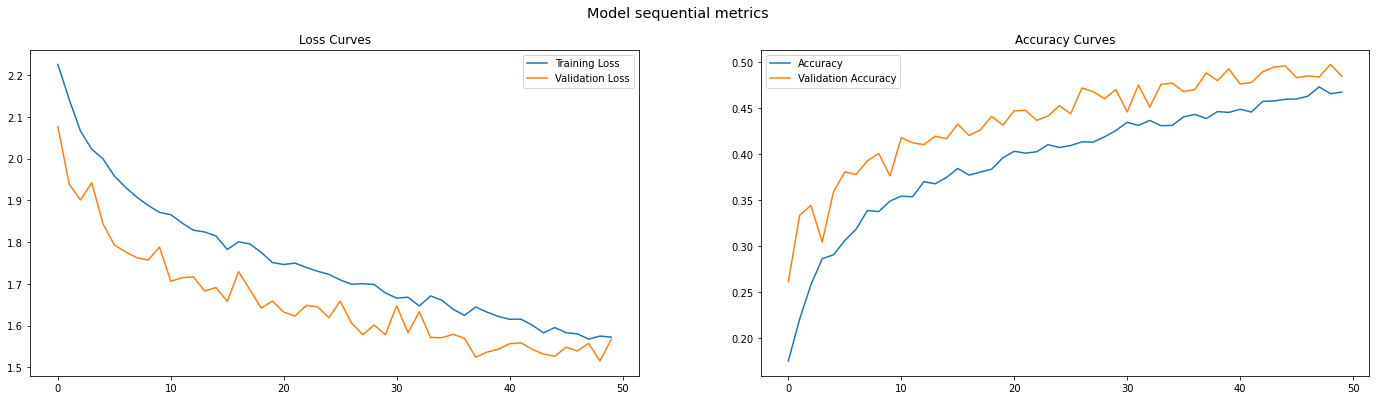

In [ ]:
plot_the_curves(history_11)

**Conclusions:** 
1. Model's ceiling seems to be around accuracy = 0,5. 
2. Possibly the model should be deeper.
3. Possibly the model should be wider.

In [ ]:
# Create a model
model_12 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    SpatialDropout2D(0.25),
    MaxPool2D(),
    Conv2D(10,3),
    Activation('relu'),
    MaxPool2D(),
    Conv2D(60, 3),
    Activation('relu'),
    MaxPool2D(),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [ ]:
# Fit the model
history_12 = model_12.fit(train_data_aug, 
                          epochs=50, 
                          steps_per_epoch=len(train_data_aug), 
                         validation_data=test_data, 
                         validation_steps=len(test_data))

Epoch 1/50
235/235 [==============================] - 110s 466ms/step - loss: 2.2479 - accuracy: 0.1585 - val_loss: 2.1313 - val_accuracy: 0.2396
Epoch 2/50
235/235 [==============================] - 108s 461ms/step - loss: 2.1343 - accuracy: 0.2299 - val_loss: 1.9940 - val_accuracy: 0.2812
Epoch 3/50
235/235 [==============================] - 108s 460ms/step - loss: 2.0730 - accuracy: 0.2605 - val_loss: 1.9038 - val_accuracy: 0.3384
Epoch 4/50
235/235 [==============================] - 109s 463ms/step - loss: 2.0392 - accuracy: 0.2711 - val_loss: 1.9079 - val_accuracy: 0.3324
Epoch 5/50
235/235 [==============================] - 108s 461ms/step - loss: 1.9821 - accuracy: 0.2993 - val_loss: 1.8604 - val_accuracy: 0.3436
Epoch 6/50
235/235 [==============================] - 109s 465ms/step - loss: 1.9572 - accuracy: 0.3105 - val_loss: 1.8021 - val_accuracy: 0.3672
Epoch 7/50
235/235 [==============================] - 108s 461ms/step - loss: 1.9251 - accuracy: 0.3315 - val_loss: 1.8152 -

In [ ]:
plot_the_curves(history_12)

NameError: ignored

Still not there... 

In [ ]:
AveragePooling2D

In [ ]:
# Create a model
model_13 = Sequential([
    Conv2D(32, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    SpatialDropout2D(0.25),
    AveragePooling2D(),
    Conv2D(16,3),
    Activation('relu'),
    AveragePooling2D(),
    Conv2D(8, 3),
    Activation('relu'),
    AveragePooling2D(),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [ ]:
history_13 = model_13.fit(train_data_aug, 
                 epochs=50, 
                 steps_per_epoch=len(train_data_aug), 
                 validation_data=test_data, 
                 validation_steps=len(test_data))

Epoch 1/50
235/235 [==============================] - 126s 484ms/step - loss: 2.2428 - accuracy: 0.1512 - val_loss: 2.1273 - val_accuracy: 0.1944
Epoch 2/50
235/235 [==============================] - 111s 471ms/step - loss: 2.1848 - accuracy: 0.1869 - val_loss: 2.1072 - val_accuracy: 0.2252
Epoch 3/50
235/235 [==============================] - 111s 474ms/step - loss: 2.1535 - accuracy: 0.2061 - val_loss: 2.0856 - val_accuracy: 0.2436
Epoch 4/50
235/235 [==============================] - 113s 481ms/step - loss: 2.1213 - accuracy: 0.2252 - val_loss: 2.0187 - val_accuracy: 0.2688
Epoch 5/50
235/235 [==============================] - 111s 474ms/step - loss: 2.0864 - accuracy: 0.2448 - val_loss: 1.9747 - val_accuracy: 0.3060
Epoch 6/50
235/235 [==============================] - 111s 470ms/step - loss: 2.0558 - accuracy: 0.2593 - val_loss: 1.9440 - val_accuracy: 0.3140
Epoch 7/50
235/235 [==============================] - 112s 478ms/step - loss: 2.0275 - accuracy: 0.2717 - val_loss: 1.9085 -

... AveragePooling2D performs worse than MaxPool2D on this type of data. So we go back to MaxPool2D and we change the structure radically 

In [ ]:
# Create a model
model_14 = Sequential([
    Conv2D(8, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    SpatialDropout2D(0.15),
    Conv2D(16,3),
    Activation('relu'),
    MaxPool2D(),
    Conv2D(32, 3),
    Activation('relu'),
    MaxPool2D(),
    Conv2D(64, 3),
    Activation('relu'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_14.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [ ]:
model_14.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 activation (Activation)     (None, 222, 222, 8)       0         
                                                                 
 spatial_dropout2d (SpatialD  (None, 222, 222, 8)      0         
 ropout2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 16)      1168      
                                                                 
 activation_1 (Activation)   (None, 220, 220, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                      

In [ ]:
history_14 = model_14.fit(train_data_aug, 
                 epochs=50, 
                 steps_per_epoch=len(train_data_aug), 
                 validation_data=test_data, 
                 validation_steps=len(test_data))

Epoch 1/50
235/235 [==============================] - 124s 474ms/step - loss: 2.2633 - accuracy: 0.1441 - val_loss: 2.1742 - val_accuracy: 0.1992
Epoch 2/50
235/235 [==============================] - 111s 472ms/step - loss: 2.1819 - accuracy: 0.1969 - val_loss: 2.0371 - val_accuracy: 0.2700
Epoch 3/50
235/235 [==============================] - 111s 470ms/step - loss: 2.1237 - accuracy: 0.2297 - val_loss: 1.9883 - val_accuracy: 0.2968
Epoch 4/50
235/235 [==============================] - 110s 470ms/step - loss: 2.0517 - accuracy: 0.2675 - val_loss: 1.9163 - val_accuracy: 0.3336
Epoch 5/50
235/235 [==============================] - 111s 471ms/step - loss: 2.0058 - accuracy: 0.2889 - val_loss: 1.9123 - val_accuracy: 0.3500
Epoch 6/50
235/235 [==============================] - 109s 466ms/step - loss: 1.9676 - accuracy: 0.2985 - val_loss: 1.7916 - val_accuracy: 0.3856
Epoch 7/50
235/235 [==============================] - 110s 466ms/step - loss: 1.9066 - accuracy: 0.3269 - val_loss: 1.7582 -

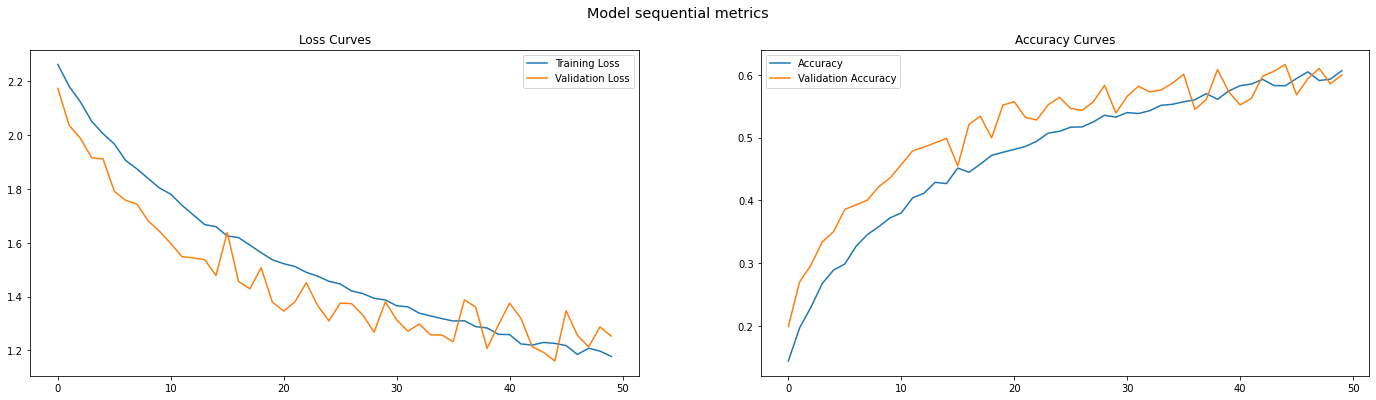

In [ ]:
plot_the_curves(history_14)

In [ ]:
# Create a model
model_15 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    SpatialDropout2D(0.15),
    Conv2D(16,3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(128, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_15.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [ ]:
model_15.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 spatial_dropout2d (SpatialD  (None, 222, 222, 32)     0         
 ropout2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 16)      4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0

In [ ]:
history_15 = model_15.fit(train_data_aug, 
                 epochs=50, 
                 steps_per_epoch=len(train_data_aug), 
                 validation_data=test_data, 
                 validation_steps=len(test_data))

Epoch 1/50
235/235 [==============================] - 131s 500ms/step - loss: 2.2349 - accuracy: 0.1637 - val_loss: 2.0780 - val_accuracy: 0.2336
Epoch 2/50
235/235 [==============================] - 117s 498ms/step - loss: 2.1094 - accuracy: 0.2372 - val_loss: 1.9839 - val_accuracy: 0.2892
Epoch 3/50
235/235 [==============================] - 117s 499ms/step - loss: 2.0295 - accuracy: 0.2724 - val_loss: 1.8772 - val_accuracy: 0.3368
Epoch 4/50
235/235 [==============================] - 116s 495ms/step - loss: 1.9663 - accuracy: 0.3061 - val_loss: 1.8415 - val_accuracy: 0.3648
Epoch 5/50
235/235 [==============================] - 116s 495ms/step - loss: 1.9068 - accuracy: 0.3328 - val_loss: 1.7186 - val_accuracy: 0.4032
Epoch 6/50
235/235 [==============================] - 117s 499ms/step - loss: 1.8292 - accuracy: 0.3685 - val_loss: 1.7248 - val_accuracy: 0.3976
Epoch 7/50
235/235 [==============================] - 116s 495ms/step - loss: 1.7949 - accuracy: 0.3749 - val_loss: 1.5818 -

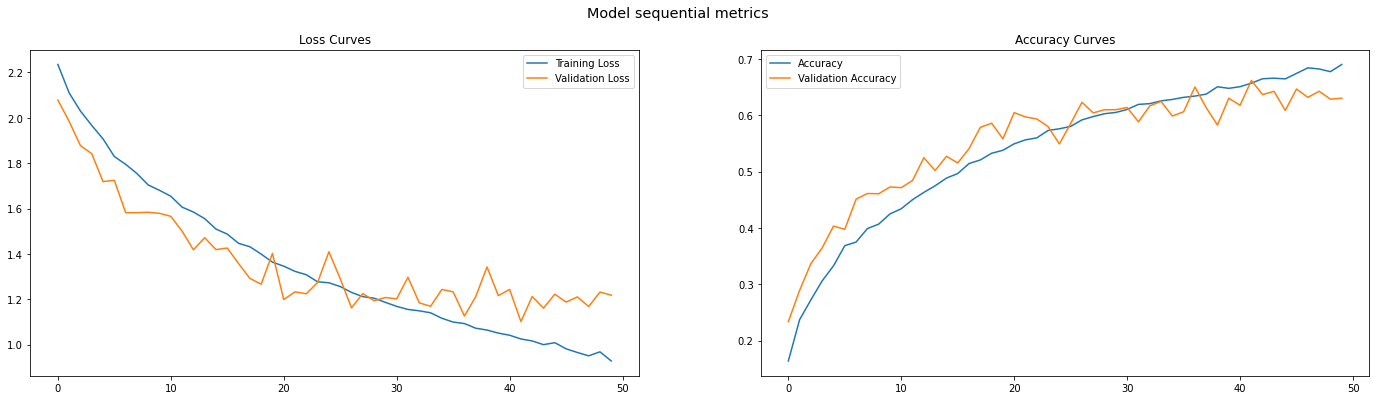

In [ ]:
plot_the_curves(history_15)

In [ ]:
# Create a model
model_16 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    SpatialDropout2D(0.15),
    Conv2D(32,3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(128, 3, activation='relu'),
    SpatialDropout2D(0.15),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_16.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [ ]:
# Fit the model
history_16 = model_16.fit(train_data_aug,
                          epochs=50,
                          steps_per_epoch=len(train_data_aug),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/50
235/235 [==============================] - 118s 498ms/step - loss: 2.2436 - accuracy: 0.1601 - val_loss: 2.0851 - val_accuracy: 0.2596
Epoch 2/50
235/235 [==============================] - 117s 496ms/step - loss: 2.1302 - accuracy: 0.2317 - val_loss: 1.9677 - val_accuracy: 0.3172
Epoch 3/50
235/235 [==============================] - 116s 494ms/step - loss: 2.0405 - accuracy: 0.2735 - val_loss: 1.8793 - val_accuracy: 0.3416
Epoch 4/50
235/235 [==============================] - 116s 495ms/step - loss: 1.9741 - accuracy: 0.3067 - val_loss: 1.7508 - val_accuracy: 0.4060
Epoch 5/50
235/235 [==============================] - 116s 494ms/step - loss: 1.9169 - accuracy: 0.3403 - val_loss: 1.6920 - val_accuracy: 0.4228
Epoch 6/50
235/235 [==============================] - 116s 494ms/step - loss: 1.8703 - accuracy: 0.3561 - val_loss: 1.6892 - val_accuracy: 0.4272
Epoch 7/50
235/235 [==============================] - 116s 493ms/step - loss: 1.8277 - accuracy: 0.3740 - val_loss: 1.6692 -

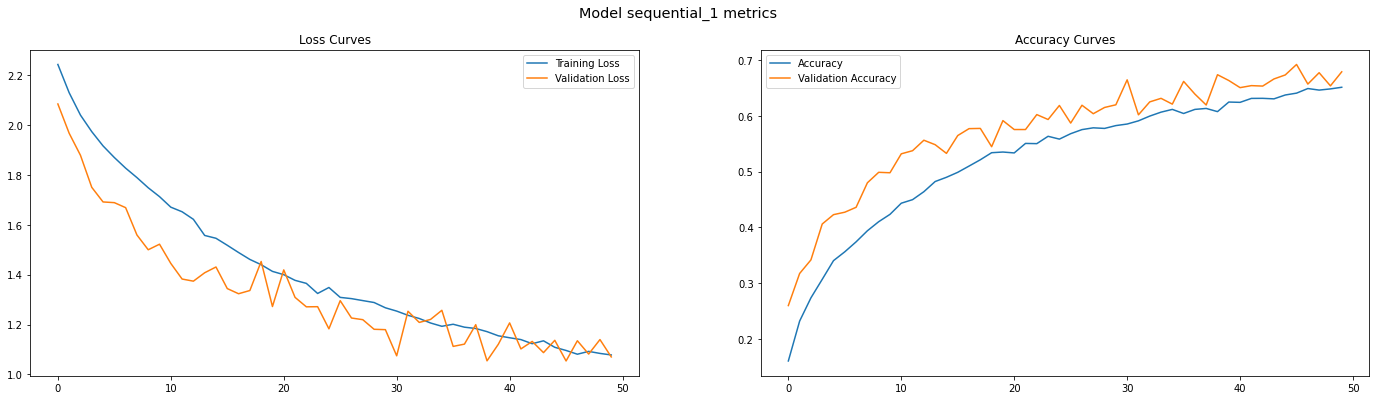

In [ ]:
plot_the_curves(history_16)

Turns out that Dense layers were acting as additional 'regularization'. Since the training with only convolutional layers went soo much faster, I will use weight and bias regularization. 
Because of the conlcuiosn drawn up here: https://analyticsindiamag.com/what-is-activity-regularization-in-neural-networks/ I try only activity regularizer.

In [ ]:
# Load l1 regularizer
from tensorflow.keras.regularizers import l1

In [ ]:
# Create a model
model_17 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    SpatialDropout2D(0.15),
    Conv2D(32,3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(128, 3, activation='relu'),
    SpatialDropout2D(0.15),
    Conv2D(128, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_17.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [ ]:
# Fit the model
history_17 = model_17.fit(train_data_aug,
                          epochs=50,
                          steps_per_epoch=len(train_data_aug),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/50
235/235 [==============================] - 117s 493ms/step - loss: 2.2414 - accuracy: 0.1545 - val_loss: 2.0346 - val_accuracy: 0.2684
Epoch 2/50
235/235 [==============================] - 116s 492ms/step - loss: 2.1109 - accuracy: 0.2375 - val_loss: 1.9882 - val_accuracy: 0.3108
Epoch 3/50
235/235 [==============================] - 115s 489ms/step - loss: 2.0514 - accuracy: 0.2639 - val_loss: 1.8885 - val_accuracy: 0.3296
Epoch 4/50
235/235 [==============================] - 115s 489ms/step - loss: 1.9955 - accuracy: 0.3085 - val_loss: 1.7844 - val_accuracy: 0.3968
Epoch 5/50
235/235 [==============================] - 115s 489ms/step - loss: 1.9443 - accuracy: 0.3180 - val_loss: 1.7674 - val_accuracy: 0.4088
Epoch 6/50
235/235 [==============================] - 115s 490ms/step - loss: 1.8937 - accuracy: 0.3409 - val_loss: 1.7552 - val_accuracy: 0.4016
Epoch 7/50
235/235 [==============================] - 117s 498ms/step - loss: 1.8364 - accuracy: 0.3637 - val_loss: 1.7668 -

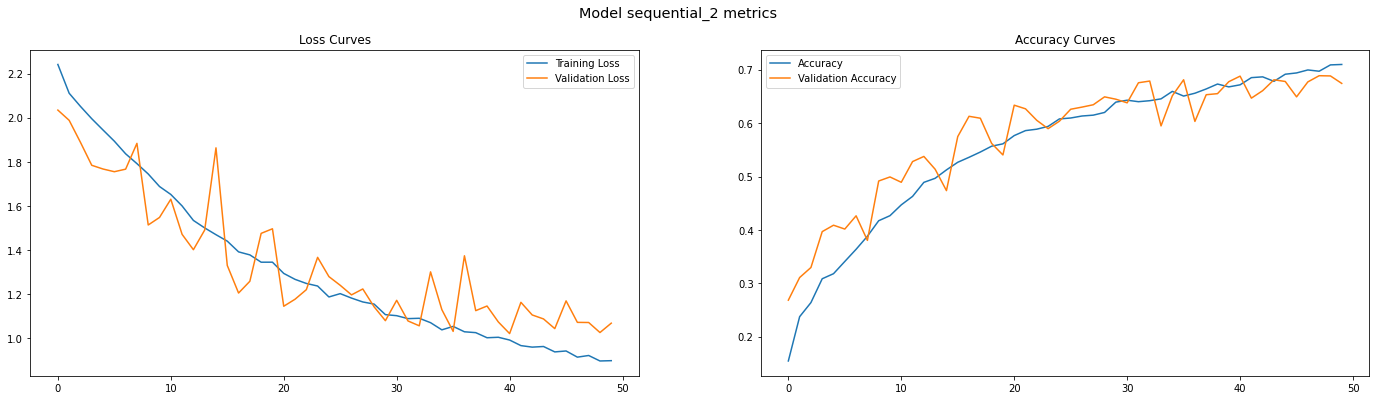

In [ ]:
plot_the_curves(history_17)

In [ ]:
model_17.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 spatial_dropout2d_5 (Spatia  (None, 222, 222, 32)     0         
 lDropout2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)      

In [ ]:
# Create a model
model_18 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    SpatialDropout2D(0.15),
    Conv2D(32,3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(128, 3, activation='relu'),
    SpatialDropout2D(0.15),
    Conv2D(128, 3, activation='relu', kernel_regularizer=l1(), bias_regularizer=l1()),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_18.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [ ]:
model_18.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 spatial_dropout2d_2 (Spatia  (None, 222, 222, 32)     0         
 lDropout2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0

In [ ]:
# Fit the model
history_18 = model_18.fit(train_data_aug,
                          epochs=100,
                          steps_per_epoch=len(train_data_aug),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/100
235/235 [==============================] - 123s 521ms/step - loss: 8.0444 - accuracy: 0.1512 - val_loss: 2.3194 - val_accuracy: 0.1756
Epoch 2/100
235/235 [==============================] - 122s 520ms/step - loss: 2.3451 - accuracy: 0.1880 - val_loss: 2.2717 - val_accuracy: 0.2416
Epoch 3/100
235/235 [==============================] - 122s 520ms/step - loss: 2.3089 - accuracy: 0.2161 - val_loss: 2.2250 - val_accuracy: 0.2716
Epoch 4/100
235/235 [==============================] - 122s 520ms/step - loss: 2.2870 - accuracy: 0.2235 - val_loss: 2.1643 - val_accuracy: 0.2752
Epoch 5/100
235/235 [==============================] - 122s 518ms/step - loss: 2.2532 - accuracy: 0.2380 - val_loss: 2.1187 - val_accuracy: 0.3084
Epoch 6/100
235/235 [==============================] - 118s 502ms/step - loss: 2.2329 - accuracy: 0.2591 - val_loss: 2.1105 - val_accuracy: 0.3276
Epoch 7/100
235/235 [==============================] - 118s 502ms/step - loss: 2.2049 - accuracy: 0.2651 - val_loss: 2

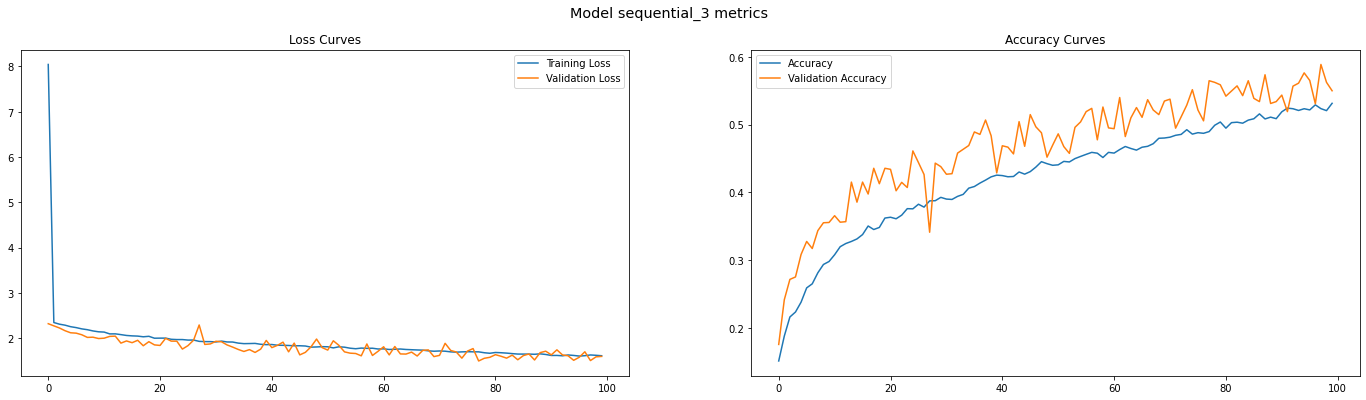

In [ ]:
plot_the_curves(history_18)

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
history_18_df = pd.DataFrame(history_18.history)

In [ ]:
history_18_df.index.to_numpy()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
np.polyfit(x=history_18_df.index.to_numpy(), y=history_18_df.loss, deg=2)

array([ 2.28237292e-04, -3.22527049e-02,  2.75303003e+00])

Text(0.5, 0, 'epochs')

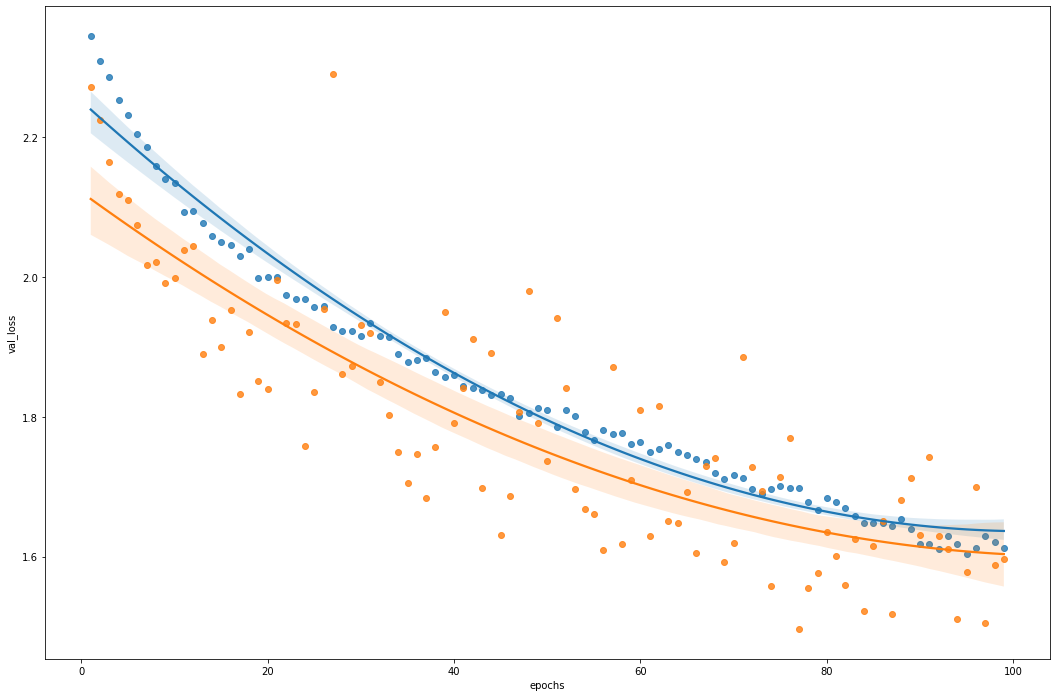

In [ ]:
from IPython.core.pylabtools import figsize
figure, ax = plt.subplots(figsize=(18,12))
sns.regplot(x='index', y='loss', data=history_18_df.reset_index().drop(labels=0, axis=0), order=2, ax=ax)
sns.regplot(x='index', y='val_loss', data=history_18_df.reset_index().drop(labels=0, axis=0), order=2, ax=ax)
plt.xlabel('epochs')

In [ ]:
history_18b = model_18.fit(train_data_aug,
                          epochs=50,
                          steps_per_epoch=len(train_data_aug),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/50
235/235 [==============================] - 116s 494ms/step - loss: 1.6046 - accuracy: 0.5241 - val_loss: 1.6718 - val_accuracy: 0.5456
Epoch 2/50
235/235 [==============================] - 116s 494ms/step - loss: 1.6101 - accuracy: 0.5229 - val_loss: 1.5465 - val_accuracy: 0.5680
Epoch 3/50
235/235 [==============================] - 116s 493ms/step - loss: 1.5932 - accuracy: 0.5399 - val_loss: 1.5775 - val_accuracy: 0.5664
Epoch 4/50
235/235 [==============================] - 116s 492ms/step - loss: 1.6127 - accuracy: 0.5301 - val_loss: 1.3936 - val_accuracy: 0.6052
Epoch 5/50
235/235 [==============================] - 116s 492ms/step - loss: 1.5914 - accuracy: 0.5404 - val_loss: 1.5182 - val_accuracy: 0.5776
Epoch 6/50
235/235 [==============================] - 115s 490ms/step - loss: 1.5960 - accuracy: 0.5399 - val_loss: 1.7298 - val_accuracy: 0.5204
Epoch 7/50
235/235 [==============================] - 115s 491ms/step - loss: 1.6053 - accuracy: 0.5260 - val_loss: 1.4184 -

KeyboardInterrupt: ignored

... so the kernel- combined with bias-regularizer killed the party. Accuracy curve look, like the want to grow but 2nd degree regression curve tells us that we are just about to see loss go up. Let's try turning the SpatialDroput a notch. Let's try narrowing and deepening the net

In [8]:
# Create a model
model_19 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    SpatialDropout2D(0.15),
    Conv2D(32,3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    SpatialDropout2D(0.15),
    Conv2D(64, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_19.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [ ]:
model_19.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 spatial_dropout2d_6 (Spatia  (None, 222, 222, 32)     0         
 lDropout2D)                                                     
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_18 (Conv2D)          (None, 106, 106, 64)     

In [ ]:
# Fit the model
history_19 = model_19.fit(train_data_aug,
                          epochs=100,
                          steps_per_epoch=len(train_data_aug),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/100
235/235 [==============================] - 120s 451ms/step - loss: 2.2530 - accuracy: 0.1537 - val_loss: 2.1430 - val_accuracy: 0.2008
Epoch 2/100
235/235 [==============================] - 106s 451ms/step - loss: 2.1810 - accuracy: 0.1991 - val_loss: 2.0454 - val_accuracy: 0.2624
Epoch 3/100
235/235 [==============================] - 106s 451ms/step - loss: 2.1098 - accuracy: 0.2419 - val_loss: 1.9707 - val_accuracy: 0.2984
Epoch 4/100
235/235 [==============================] - 106s 453ms/step - loss: 2.0540 - accuracy: 0.2735 - val_loss: 1.8863 - val_accuracy: 0.3428
Epoch 5/100
235/235 [==============================] - 106s 452ms/step - loss: 2.0055 - accuracy: 0.2927 - val_loss: 1.7891 - val_accuracy: 0.3796
Epoch 6/100
235/235 [==============================] - 107s 454ms/step - loss: 1.9568 - accuracy: 0.3244 - val_loss: 1.7856 - val_accuracy: 0.3844
Epoch 7/100
235/235 [==============================] - 106s 452ms/step - loss: 1.9065 - accuracy: 0.3343 - val_loss: 1

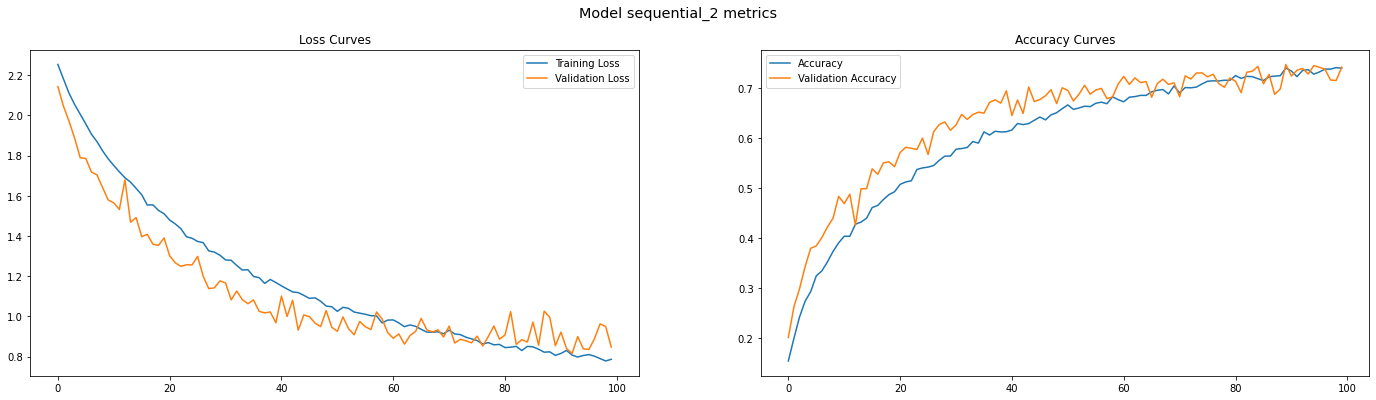

In [ ]:
plot_the_curves(history_19)

In [ ]:
def plot_curves_with_regression(history, order=2):
    
    '''
    Uses seaborn and to plot curves 
    as scatterplot with regression
    attrs:
    history: history object
    order: order of regression curve 
    default order=2   
    '''
    
    # Create DataFrame
    df = pd.DataFrame(history.history)
    
    # Setup the figure
    plt.figure(figsize=(32, 8))
    plt.suptitle(f'Model {history.model.name} metrics', fontsize='x-large')
    
    # Plot loss
    plt.subplot(1, 2, 1)
    sns.regplot(x='index', y='loss', data=df.reset_index(), 
                order=order, label='Training Loss')
    sns.regplot(x='index', y='val_loss', data=df.reset_index(), 
                order=order, label='Validation Loss')
    plt.legend()
    plt.title('Loss Curves')

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    sns.regplot(x='index', y='accuracy', data=df.reset_index(), 
                order=order, label='Training Accuracy')
    sns.regplot(x='index', y='val_accuracy', data=df.reset_index(), 
                order=order, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy Curves')


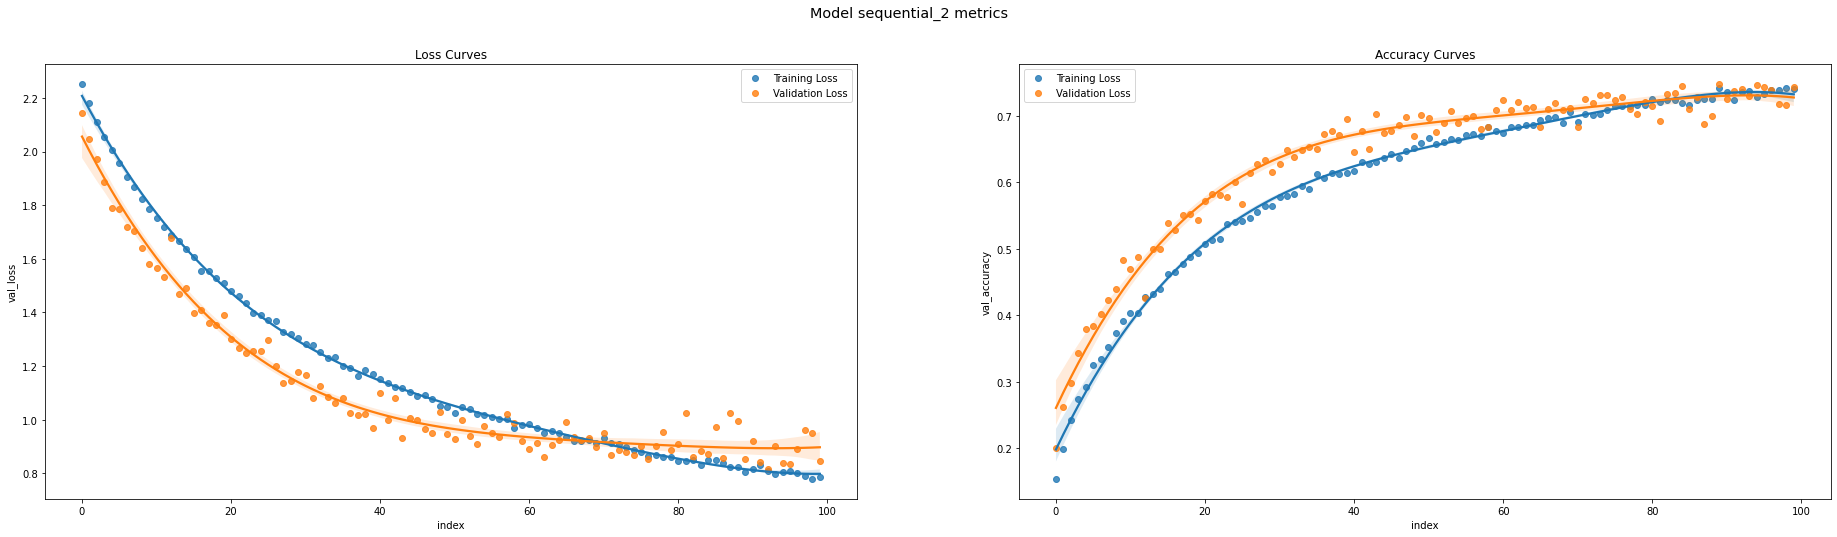

In [ ]:
plot_curves_with_regression(history_19, order=4)

In [9]:
# Create a model
model_20 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(32,3, activation='relu'),
    SpatialDropout2D(0.20),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    SpatialDropout2D(0.20),
    Conv2D(128, 6, activation='relu'),
    Conv2D(128, 6, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_20.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [ ]:
model_20.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_30 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 spatial_dropout2d_10 (Spati  (None, 220, 220, 32)     0         
 alDropout2D)                                                    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_32 (Conv2D)          (None, 106, 106, 64)     

In [ ]:
# Fit the model
history_20 = model_20.fit(train_data_aug,
                          epochs=100,
                          steps_per_epoch=len(train_data_aug),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/100
235/235 [==============================] - 116s 475ms/step - loss: 2.2519 - accuracy: 0.1591 - val_loss: 2.1664 - val_accuracy: 0.1972
Epoch 2/100
235/235 [==============================] - 106s 452ms/step - loss: 2.1855 - accuracy: 0.1879 - val_loss: 2.0834 - val_accuracy: 0.2212
Epoch 3/100
235/235 [==============================] - 107s 453ms/step - loss: 2.1580 - accuracy: 0.2096 - val_loss: 2.0726 - val_accuracy: 0.2400
Epoch 4/100
235/235 [==============================] - 107s 454ms/step - loss: 2.1322 - accuracy: 0.2152 - val_loss: 2.0485 - val_accuracy: 0.2488
Epoch 5/100
235/235 [==============================] - 107s 453ms/step - loss: 2.0980 - accuracy: 0.2416 - val_loss: 1.9380 - val_accuracy: 0.3260
Epoch 6/100
235/235 [==============================] - 106s 451ms/step - loss: 2.0468 - accuracy: 0.2744 - val_loss: 1.9173 - val_accuracy: 0.3456
Epoch 7/100
235/235 [==============================] - 106s 452ms/step - loss: 2.0140 - accuracy: 0.2873 - val_loss: 1

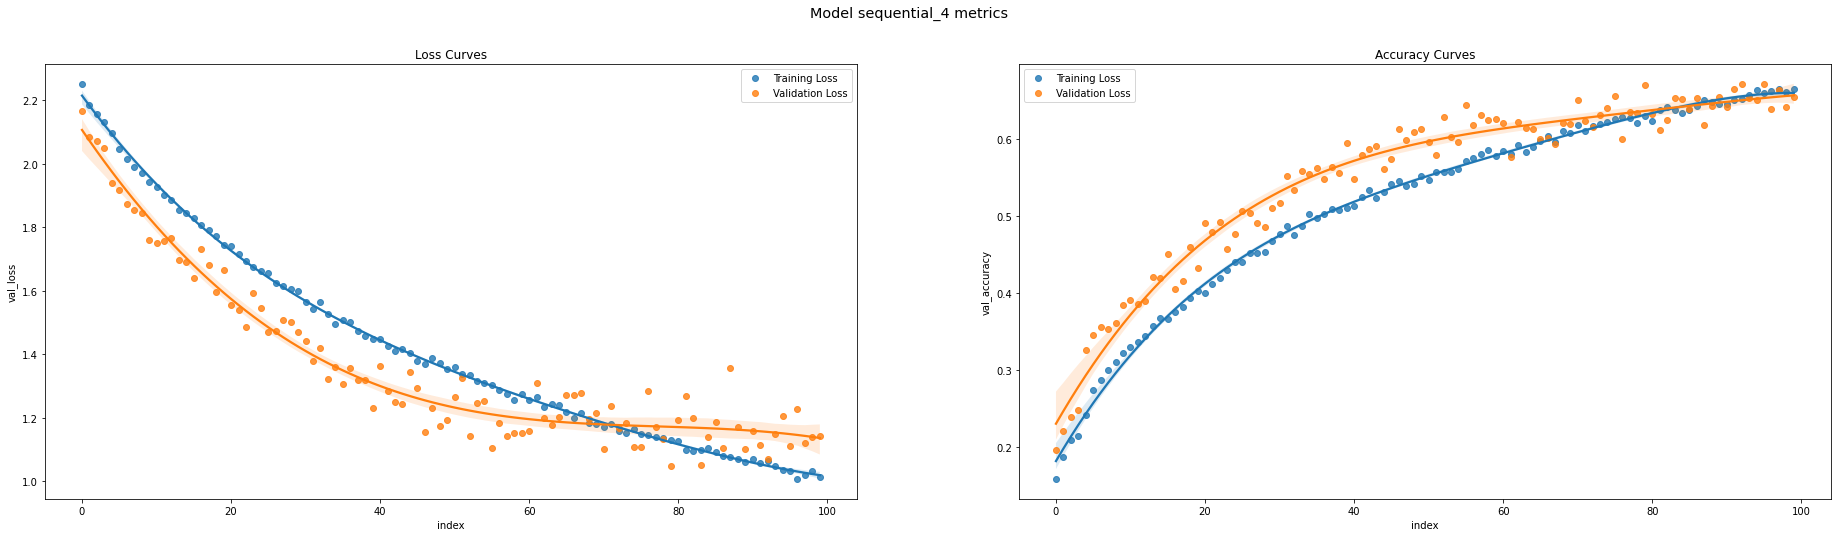

In [ ]:
plot_curves_with_regression(history_20, order=4)

In [10]:
model_19.summary(), model_20.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 spatial_dropout2d (SpatialD  (None, 222, 222, 32)     0         
 ropout2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      3

(None, None)

In [19]:
# Create a model
model_21 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    SpatialDropout2D(0.15),
    Conv2D(32,3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    SpatialDropout2D(0.15),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_21.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [20]:
model_21.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 spatial_dropout2d_8 (Spatia  (None, 222, 222, 32)     0         
 lDropout2D)                                                     
                                                                 
 conv2d_31 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 spatial_dropout2d_9 (Spatia  (None, 108, 108, 64)    

In [21]:
history_21 = model_21.fit(train_data_aug,
                          epochs=100,
                          steps_per_epoch=len(train_data_aug),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/100
235/235 [==============================] - 117s 494ms/step - loss: 2.2243 - accuracy: 0.1807 - val_loss: 2.0308 - val_accuracy: 0.2948
Epoch 2/100
235/235 [==============================] - 115s 489ms/step - loss: 2.0888 - accuracy: 0.2525 - val_loss: 1.9397 - val_accuracy: 0.2980
Epoch 3/100
235/235 [==============================] - 115s 489ms/step - loss: 2.0370 - accuracy: 0.2809 - val_loss: 1.8731 - val_accuracy: 0.3536
Epoch 4/100
235/235 [==============================] - 115s 489ms/step - loss: 1.9836 - accuracy: 0.3085 - val_loss: 1.8205 - val_accuracy: 0.3688
Epoch 5/100
235/235 [==============================] - 115s 489ms/step - loss: 1.9477 - accuracy: 0.3208 - val_loss: 1.7526 - val_accuracy: 0.4160
Epoch 6/100
235/235 [==============================] - 115s 488ms/step - loss: 1.9048 - accuracy: 0.3379 - val_loss: 1.7253 - val_accuracy: 0.4052
Epoch 7/100
235/235 [==============================] - 115s 488ms/step - loss: 1.8651 - accuracy: 0.3607 - val_loss: 1

In [ ]:
# Create a model
model_22 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    SpatialDropout2D(0.15),
    Conv2D(32,3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    SpatialDropout2D(0.15),
    Conv2D(64, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_22.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])